Importing required Librabries

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Importing netflix movie '.csv' file

In [26]:
from google.colab import files

uploaded = files.upload()

Saving Netflix Data.xlsx to Netflix Data (1).xlsx


Loading the data

In [27]:
netflix = pd.read_excel('Netflix Data.xlsx')

print(netflix.head())
print(netflix.info())

          Release_Date                    Title  \
0  2021-12-15 00:00:00  Spider-Man: No Way Home   
1  2022-03-01 00:00:00               The Batman   
2  2022-02-25 00:00:00                  No Exit   
3  2021-11-24 00:00:00                  Encanto   
4  2021-12-22 00:00:00           The King's Man   

                                            Overview  Popularity Vote_Count  \
0  Peter Parker is unmasked and no longer able to...    5083.954       8940   
1  In his second year of fighting crime, Batman u...    3827.658       1151   
2  Stranded at a rest stop in the mountains durin...    2618.087        122   
3  The tale of an extraordinary family, the Madri...    2402.201       5076   
4  As a collection of history's worst tyrants and...    1895.511       1793   

  Vote_Average Original_Language                               Genre  \
0          8.3                en  Action, Adventure, Science Fiction   
1          8.1                en            Crime, Mystery, Thriller   
2 

Changing some columns' data type:
1. Release_Date : from Object to Date time
2. Vote_Count : from Object to int
3. Vote_Average : from Object to float

In [28]:
netflix['Release_Date'] = pd.to_datetime(netflix['Release_Date'], errors = 'coerce')
netflix['Vote_Count'] = pd.to_numeric(netflix['Vote_Count'], errors = 'coerce').astype('Int64')
netflix['Vote_Average'] = pd.to_numeric(netflix['Vote_Average'], errors = 'coerce')

print(netflix.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9837 entries, 0 to 9836
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Release_Date       9827 non-null   datetime64[ns]
 1   Title              9828 non-null   object        
 2   Overview           9828 non-null   object        
 3   Popularity         9827 non-null   float64       
 4   Vote_Count         9826 non-null   Int64         
 5   Vote_Average       9826 non-null   float64       
 6   Original_Language  9827 non-null   object        
 7   Genre              9826 non-null   object        
 8   Poster_Url         9826 non-null   object        
dtypes: Int64(1), datetime64[ns](1), float64(2), object(5)
memory usage: 701.4+ KB
None


Checking duplicates

In [29]:
print(netflix.duplicated().sum())

8


Dropping the duplicates

In [30]:
netflix = netflix.drop_duplicates(subset = ['Release_Date', 'Title', 'Overview', 'Popularity', 'Vote_Count', 'Vote_Average', 'Original_Language', 'Genre', 'Poster_Url'], keep = False)

Checking number of duplicates after dropping duplicates

In [31]:
print(netflix.duplicated().sum())

0


Converting Release_Date columns' data so it'd contain just year

In [32]:
netflix['Release_Date'] = netflix['Release_Date'].dt.year.astype('Int64')
print(netflix.info())

<class 'pandas.core.frame.DataFrame'>
Index: 9828 entries, 0 to 9836
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9827 non-null   Int64  
 1   Title              9828 non-null   object 
 2   Overview           9828 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9826 non-null   Int64  
 5   Vote_Average       9826 non-null   float64
 6   Original_Language  9827 non-null   object 
 7   Genre              9826 non-null   object 
 8   Poster_Url         9826 non-null   object 
dtypes: Int64(2), float64(2), object(5)
memory usage: 787.0+ KB
None


checking the values in Release_Date Column

In [33]:
print(netflix.head())

   Release_Date                    Title  \
0          2021  Spider-Man: No Way Home   
1          2022               The Batman   
2          2022                  No Exit   
3          2021                  Encanto   
4          2021           The King's Man   

                                            Overview  Popularity  Vote_Count  \
0  Peter Parker is unmasked and no longer able to...    5083.954        8940   
1  In his second year of fighting crime, Batman u...    3827.658        1151   
2  Stranded at a rest stop in the mountains durin...    2618.087         122   
3  The tale of an extraordinary family, the Madri...    2402.201        5076   
4  As a collection of history's worst tyrants and...    1895.511        1793   

   Vote_Average Original_Language                               Genre  \
0           8.3                en  Action, Adventure, Science Fiction   
1           8.1                en            Crime, Mystery, Thriller   
2           6.3                en  

Dropping 'Overview', 'Original_Language' and 'Poster_Url' column as they are not needed for answering the asked quesitons

In [34]:
netflix.drop(['Overview', 'Original_Language', 'Poster_Url'], axis = 1, inplace = True)

Checking the dataset

In [35]:
print(netflix.head())

   Release_Date                    Title  Popularity  Vote_Count  \
0          2021  Spider-Man: No Way Home    5083.954        8940   
1          2022               The Batman    3827.658        1151   
2          2022                  No Exit    2618.087         122   
3          2021                  Encanto    2402.201        5076   
4          2021           The King's Man    1895.511        1793   

   Vote_Average                               Genre  
0           8.3  Action, Adventure, Science Fiction  
1           8.1            Crime, Mystery, Thriller  
2           6.3                            Thriller  
3           7.7  Animation, Comedy, Family, Fantasy  
4           7.0    Action, Adventure, Thriller, War  


Categorizing the float Values of Vote_Average column to some labels, and for that I'm creating a user defined function, i.e, Categorizing_col()

In [36]:
def categorizing_col(netflix, col, labels):

  edges = [
      netflix[col].describe()['min'],
      netflix[col].describe()['25%'],
      netflix[col].describe()['50%'],
      netflix[col].describe()['75%'],
      netflix[col].describe()['max']

  ]

  netflix[col] = pd.cut(netflix[col], edges, labels = labels, duplicates = 'drop')
  return netflix

Calling the function and checking the unique values of the column Vote_Average

In [37]:
labels = ['not_popular', 'below_avg', 'average', 'popular']

categorizing_col(netflix, 'Vote_Average', labels)

print(netflix['Vote_Average'].unique())

['popular', 'below_avg', 'average', 'not_popular', NaN]
Categories (4, object): ['not_popular' < 'below_avg' < 'average' < 'popular']


Checking if the datatset is reflected

In [38]:
print(netflix.head())

   Release_Date                    Title  Popularity  Vote_Count Vote_Average  \
0          2021  Spider-Man: No Way Home    5083.954        8940      popular   
1          2022               The Batman    3827.658        1151      popular   
2          2022                  No Exit    2618.087         122    below_avg   
3          2021                  Encanto    2402.201        5076      popular   
4          2021           The King's Man    1895.511        1793      average   

                                Genre  
0  Action, Adventure, Science Fiction  
1            Crime, Mystery, Thriller  
2                            Thriller  
3  Animation, Comedy, Family, Fantasy  
4    Action, Adventure, Thriller, War  


Checking the total number of movies per each label

In [39]:
print(netflix['Vote_Average'].value_counts())

Vote_Average
not_popular    2467
popular        2450
average        2411
below_avg      2398
Name: count, dtype: int64


changing the datatype of 'Genre' column Splitting the cell values of Genre in a list so we can have a single value per row for Genre Column.

In [41]:
netflix['Genre'] = netflix['Genre'].astype(str).str.split(', ')

netflix = netflix.explode('Genre').reset_index(drop = True)

print(netflix.head(10))

   Release_Date                    Title  Popularity  Vote_Count Vote_Average  \
0          2021  Spider-Man: No Way Home    5083.954        8940      popular   
1          2021  Spider-Man: No Way Home    5083.954        8940      popular   
2          2021  Spider-Man: No Way Home    5083.954        8940      popular   
3          2022               The Batman    3827.658        1151      popular   
4          2022               The Batman    3827.658        1151      popular   
5          2022               The Batman    3827.658        1151      popular   
6          2022                  No Exit    2618.087         122    below_avg   
7          2021                  Encanto    2402.201        5076      popular   
8          2021                  Encanto    2402.201        5076      popular   
9          2021                  Encanto    2402.201        5076      popular   

             Genre  
0           Action  
1        Adventure  
2  Science Fiction  
3            Crime  
4  

Categorizing the Genre Column's Values by using astype()

In [46]:
netflix['Genre'] = netflix['Genre'].astype('category')

print(netflix['Genre'].dtypes)

print(netflix.info())

category
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25794 entries, 0 to 25793
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Release_Date  25793 non-null  Int64   
 1   Title         25794 non-null  object  
 2   Popularity    25793 non-null  float64 
 3   Vote_Count    25792 non-null  Int64   
 4   Vote_Average  25551 non-null  category
 5   Genre         25794 non-null  category
dtypes: Int64(2), category(2), float64(1), object(1)
memory usage: 907.8+ KB
None
0


**Data Preprocessing is done.**

**Now, Performing Data Visualization for answering questions**

**First Question:**

1. What is the most frequent Genre of movies released on Netflix?

In [87]:
total = len(netflix)
print(total)
print(netflix['Genre'].value_counts()) # for getting the number of movies released for 'Drama' Genre.
perct = (3715 / 25551) * 100
print(perct)

25551
Genre
Drama              3715
Comedy             3006
Action             2652
Thriller           2473
Adventure          1829
Romance            1461
Horror             1457
Animation          1425
Family             1405
Fantasy            1295
Science Fiction    1255
Crime              1235
Mystery             765
History             426
War                 307
Music               291
TV Movie            214
Documentary         203
Western             137
nan                   0
Name: count, dtype: int64
14.539548354271847


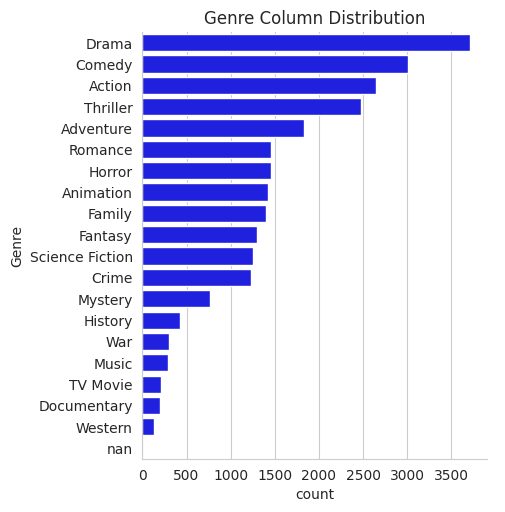

In [70]:
sns.catplot(y = netflix['Genre'], kind = 'count', color = 'blue', order = netflix['Genre'].value_counts().index)
plt.title('Genre Column Distribution')
plt.show()

**Asnswer of Question 1:**

The **Drama Genre** is the most **frequent** Genre of movies released on Netflix, with **14.539%** of the total Genres on Netflix.

**Second Question:**
2. Which Genre has highest votes?

/tmp/ipython-input-95-1579024432.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  genre_votes = netflix.groupby('Genre')['Vote_Count'].sum().sort_values(ascending=False).reset_index()


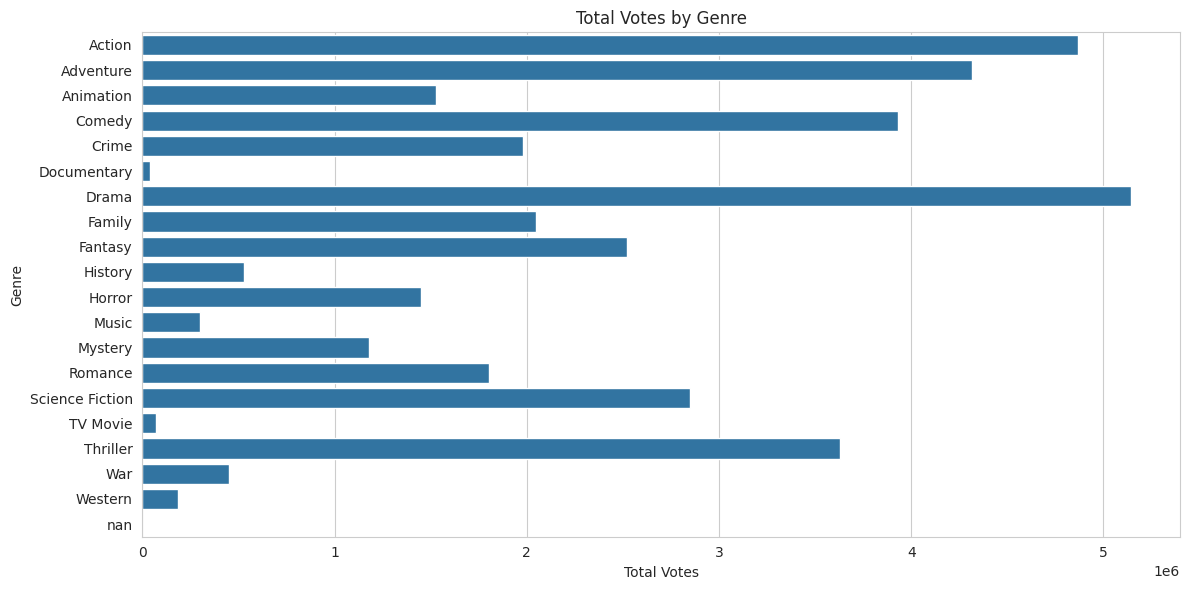

In [95]:
genre_votes = netflix.groupby('Genre')['Vote_Count'].sum().sort_values(ascending=False).reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=genre_votes, x='Vote_Count', y='Genre')
plt.title('Total Votes by Genre')
plt.xlabel('Total Votes')
plt.ylabel('Genre')
plt.tight_layout()
plt.show()

**Asnwer of Question 2:**

**Drama** Genre Movies has the highest number of Votes.

**Third Question:**
3. Which Movie has highest popularity? and what is it's Genre?

In [78]:
print(netflix[netflix['Popularity'] == netflix['Popularity'].max()])

   Release_Date                    Title  Popularity  Vote_Count Vote_Average  \
0          2021  Spider-Man: No Way Home    5083.954        8940      popular   
1          2021  Spider-Man: No Way Home    5083.954        8940      popular   
2          2021  Spider-Man: No Way Home    5083.954        8940      popular   

             Genre  
0           Action  
1        Adventure  
2  Science Fiction  


In this code snippet, **netflix['Popularity'].max()** returns the maximum values from the Popularity column and matches it with the values of actual Popularity Column.
Then for whichsoever value of the Popularity column matches with the maximun values it masks it with the value **True**, and lastly the print statement prints the movie with highest popularity along with its Genre.

**Asnwer of Question 3:**

So the Movie with highest Popularity is **Spider-Man: No Way Home** with Genre **Action**, **Adventure** and **Science Fiction**.

**Fourth Question:**
4. Which Movie has Lowest popularity? what is it's Genre?

In [79]:
print(netflix[netflix['Popularity'] == netflix['Popularity'].min()])

       Release_Date                                 Title  Popularity  \
25788          2021  The United States vs. Billie Holiday      13.354   
25789          2021  The United States vs. Billie Holiday      13.354   
25790          2021  The United States vs. Billie Holiday      13.354   
25791          1984                               Threads      13.354   
25792          1984                               Threads      13.354   
25793          1984                               Threads      13.354   

       Vote_Count Vote_Average            Genre  
25788         152      average            Music  
25789         152      average            Drama  
25790         152      average          History  
25791         186      popular              War  
25792         186      popular            Drama  
25793         186      popular  Science Fiction  


The Explanation for Question 4's code snippet is same as Question 3 except it provides minumun value instead of maximun value.

**Asnwer of Question 4:**

So Movies with lowest Popularity are 2 and they are:
1. The **United States vs. Billie Holiday**, its Genre are **Music**, **Drama** and **History**
2. **Threads**, its Genre are **War**, **Drama** and **Science Fiction**.

**Fifth Question:**
5. Which year has most filmed movies?

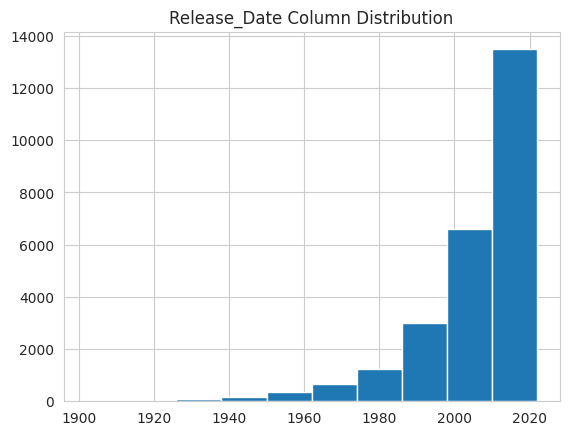

In [80]:
netflix['Release_Date'].hist()
plt.title('Release_Date Column Distribution')
plt.show()

**Asnwer of Question 5:**

so, The year in which Netflix filmed highest number of movies is **2020**.